<h1 style="
    font-family: 'Trebuchet MS', sans-serif; 
    padding: 40px; 
    font-size: 48px; 
    text-align: center; 
    line-height: 1.4; 
    color: #ffffff; 
    background: linear-gradient(135deg, #ff6a6a, #ffcc70); 
    border-radius: 20px; 
    box-shadow: 3px 3px 10px rgba(0,0,0,0.3);
    text-shadow: 2px 2px 4px rgba(0,0,0,0.3);
">
    <b>Heart Disease EDA</b>
</h1>


In [217]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
  
df = pd.read_csv('/kaggle/input/heart-failure-prediction/heart.csv')
df.head()

FileNotFoundError: [Errno 2] No such file or directory: '/kaggle/input/heart-failure-prediction/heart.csv'

In [ ]:
df.shape

In [ ]:
df.columns

In [ ]:
df.info()

In [ ]:
df.describe()

In [ ]:
sns.heatmap(df.isnull(),cmap = 'magma',cbar = False);


In [ ]:
sns.displot( df['Age'])

In [ ]:
sns.displot(df['Age'], kde=True)

In [ ]:
sns.distplot(df['Age'], kde= True, hist = True, rug = True)

In [ ]:
sns.displot(df['RestingBP'], kde = True, color = 'blue')

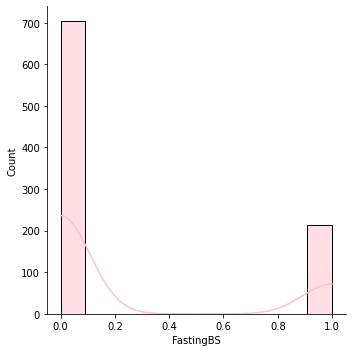

In [218]:
sns.displot(df['FastingBS'], kde = True, color = 'pink')

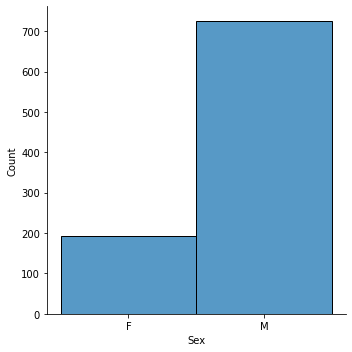

In [219]:
sns.displot(df['Sex'])

# Pie chart distribution #

<AxesSubplot:ylabel='None'>

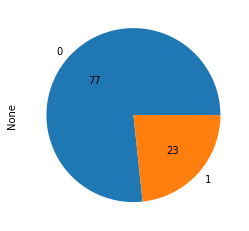

In [220]:
df.groupby('FastingBS').size().plot(kind = 'pie', autopct = '%.0f')

<AxesSubplot:ylabel='None'>

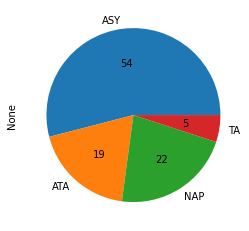

In [221]:
df.groupby('ChestPainType').size().plot(kind = 'pie', autopct = '%.0f')

<AxesSubplot:ylabel='None'>

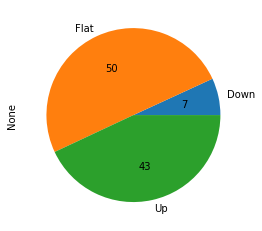

In [222]:
df.groupby('ST_Slope').size().plot(kind = 'pie', autopct = '%.0f')

<AxesSubplot:ylabel='None'>

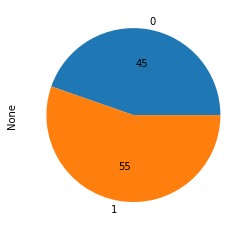

In [223]:
df.groupby('HeartDisease').size().plot(kind = 'pie', autopct = '%.0f')

## violinPlot ##

<AxesSubplot:xlabel='HeartDisease', ylabel='Sex'>

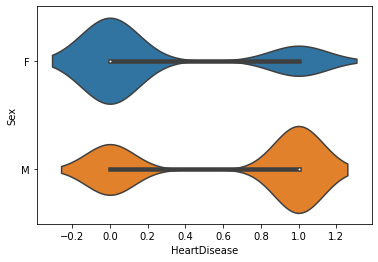

In [224]:
sns.violinplot(y = df['Sex'], x = df['HeartDisease'])

<AxesSubplot:xlabel='HeartDisease', ylabel='Age'>

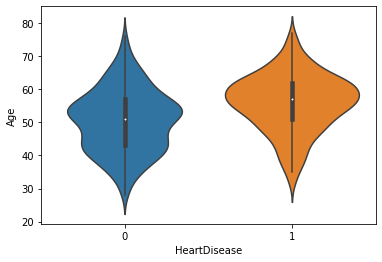

In [225]:
sns.violinplot(y = df['Age'], x = df['HeartDisease'])

<AxesSubplot:xlabel='HeartDisease', ylabel='Cholesterol'>

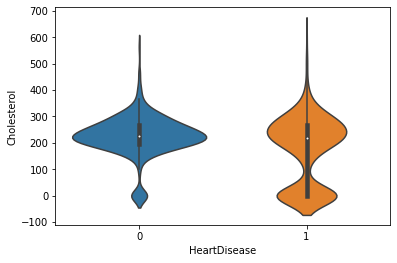

In [226]:
sns.violinplot(y = df['Cholesterol'], x = df['HeartDisease'])

In [227]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.00,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.00,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.00,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.50,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.00,Up,0


## correlation  (Heatmap)

In [228]:
df.corr()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
Age,1.00,0.25,-0.10,0.20,-0.38,0.26,0.28
RestingBP,0.25,1.00,0.10,0.07,-0.11,0.16,0.11
Cholesterol,-0.10,0.10,1.00,-0.26,0.24,0.05,-0.23
FastingBS,0.20,0.07,-0.26,1.00,-0.13,0.05,0.27
MaxHR,-0.38,-0.11,0.24,-0.13,1.00,-0.16,-0.40
Oldpeak,0.26,0.16,0.05,0.05,-0.16,1.00,0.40
HeartDisease,0.28,0.11,-0.23,0.27,-0.40,0.40,1.00


<AxesSubplot:>

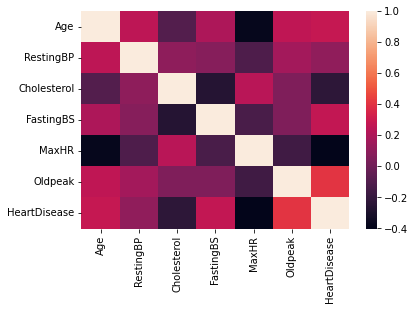

In [229]:
sns.heatmap(df.corr())

## JointPlot

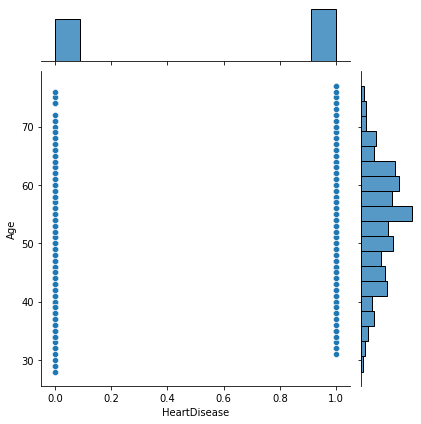

In [230]:
sns.jointplot(x = 'HeartDisease', y ='Age', data = df)

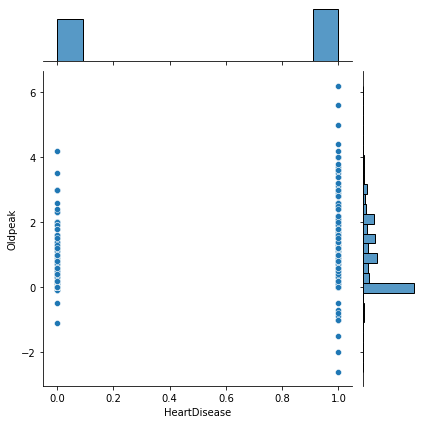

In [231]:
sns.jointplot(x = 'HeartDisease', y ='Oldpeak', data = df)

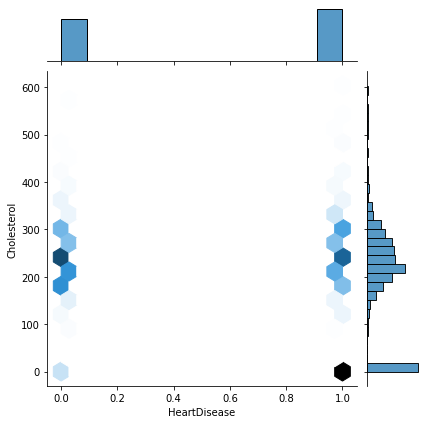

In [232]:
sns.jointplot(x = 'HeartDisease', y ='Cholesterol', data = df, kind = 'hex')

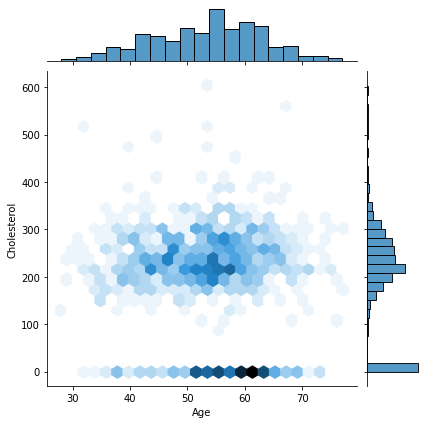

In [233]:
sns.jointplot(x = 'Age', y ='Cholesterol', data = df, kind = 'hex')

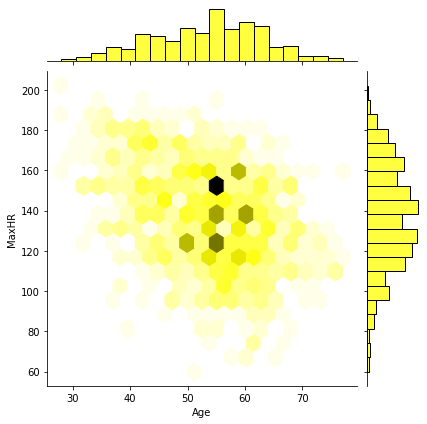

In [234]:
sns.jointplot(x = 'Age', y ='MaxHR', data = df, kind = 'hex', color = 'yellow')

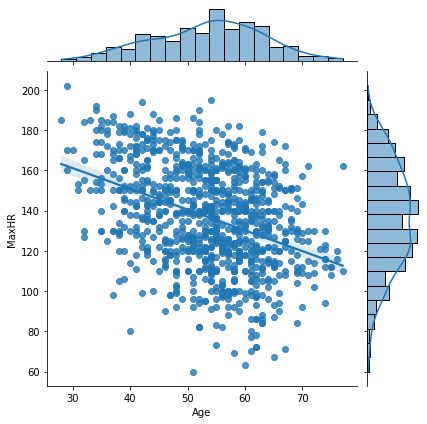

In [235]:
sns.jointplot(x = 'Age', y ='MaxHR', data = df, kind = 'reg')

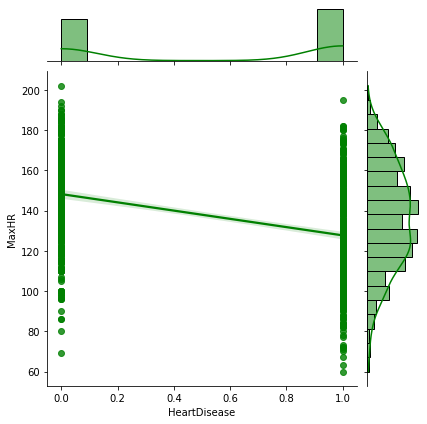

In [236]:
sns.jointplot(x = 'HeartDisease', y ='MaxHR', data = df, kind = 'reg', color = 'green')

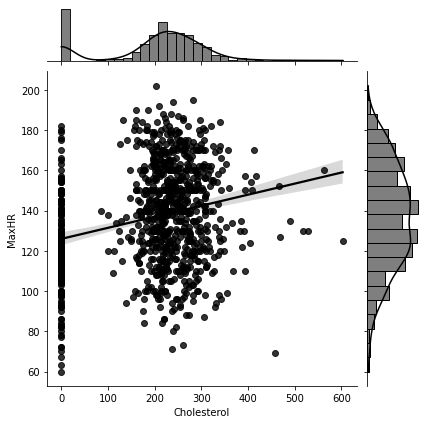

In [237]:
sns.jointplot(x = 'Cholesterol', y ='MaxHR', data = df, kind = 'reg', color = 'black')

## PairPlot

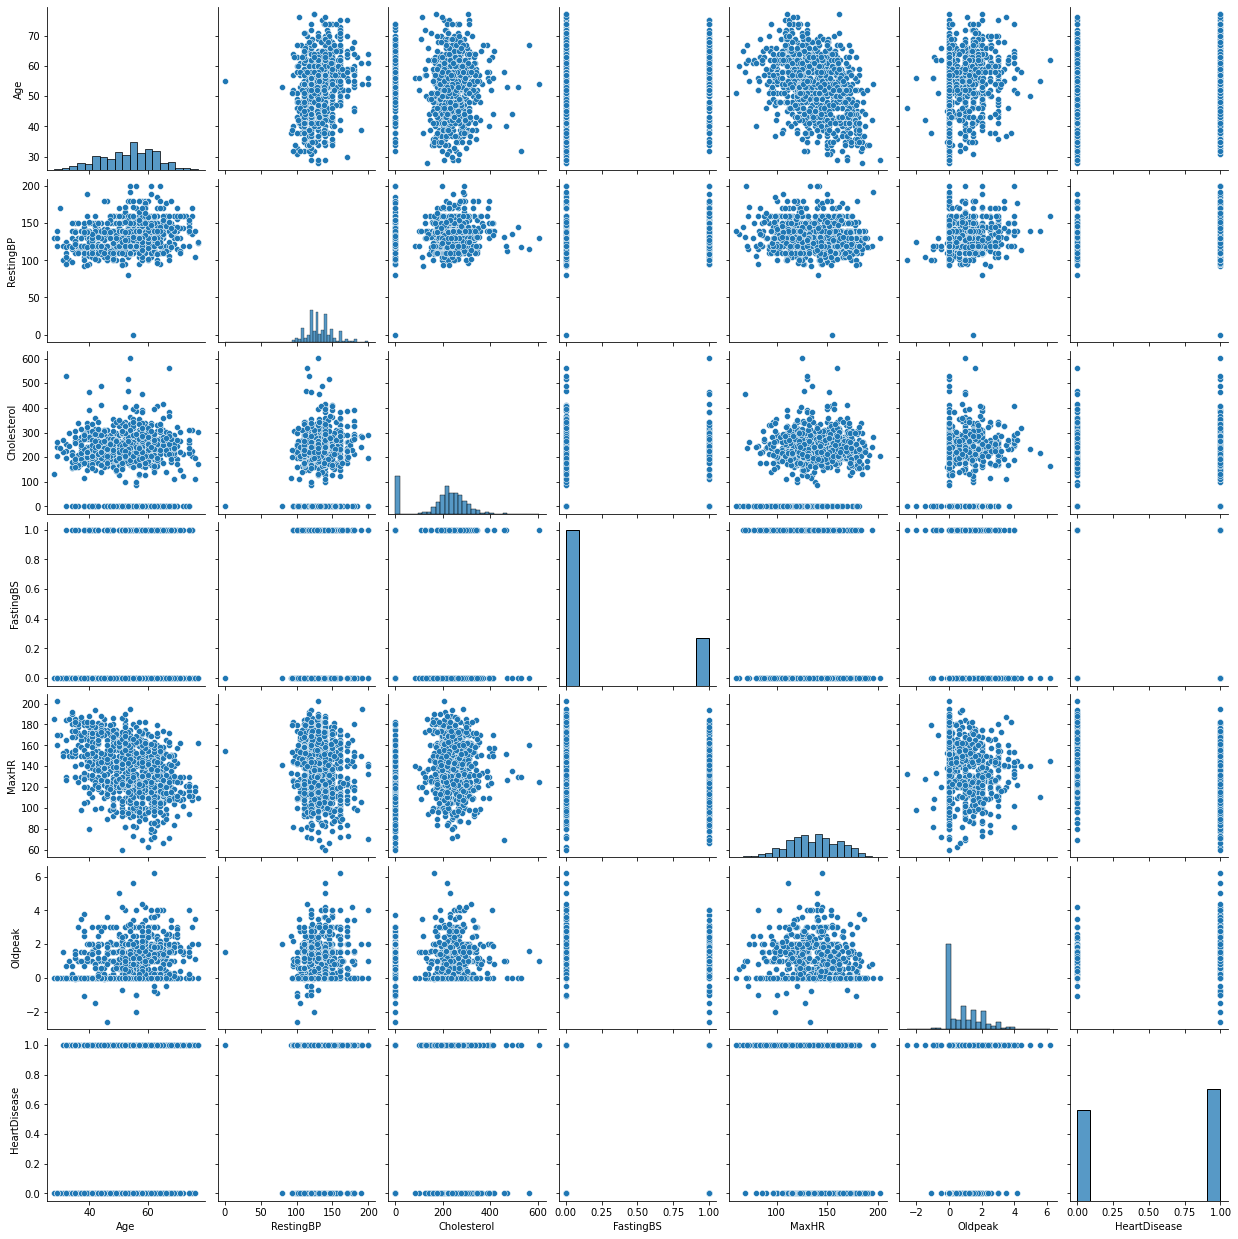

In [238]:
sns.pairplot(df)

In [239]:
#  Encode categorical features
categorical_cols = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']
for col in categorical_cols:
    df[col] = df[col].astype('category')

In [240]:
print("\n🔹 Unique values per categorical column:")
for col in categorical_cols:
    print(f"{col}: {df[col].unique()}")


🔹 Unique values per categorical column:
Sex: ['M', 'F']
Categories (2, object): ['F', 'M']
ChestPainType: ['ATA', 'NAP', 'ASY', 'TA']
Categories (4, object): ['ASY', 'ATA', 'NAP', 'TA']
RestingECG: ['Normal', 'ST', 'LVH']
Categories (3, object): ['LVH', 'Normal', 'ST']
ExerciseAngina: ['N', 'Y']
Categories (2, object): ['N', 'Y']
ST_Slope: ['Up', 'Flat', 'Down']
Categories (3, object): ['Down', 'Flat', 'Up']


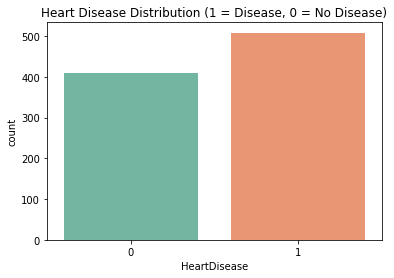

In [241]:
# Check target distribution
plt.figure(figsize=(6,4))
sns.countplot(x='HeartDisease', data=df, palette='Set2')
plt.title("Heart Disease Distribution (1 = Disease, 0 = No Disease)")
plt.show()

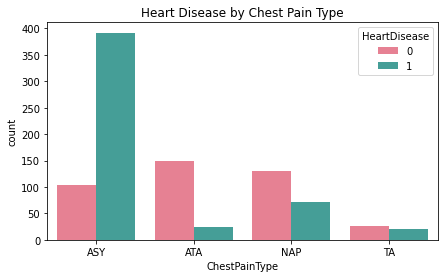

In [242]:
# Chest Pain Type vs Heart Disease
plt.figure(figsize=(7,4))
sns.countplot(x='ChestPainType', hue='HeartDisease', data=df, palette='husl')
plt.title("Heart Disease by Chest Pain Type")
plt.show()

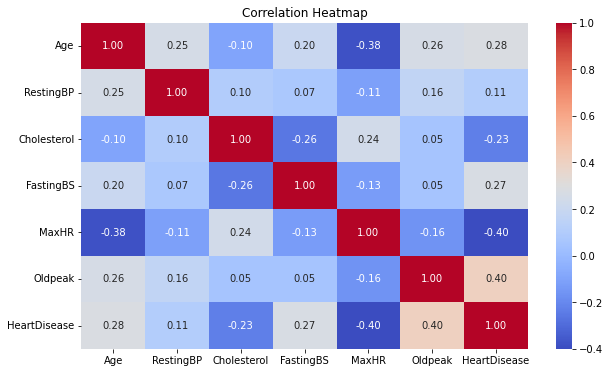

In [243]:
# Correlation between numeric variables
numeric_df = df.select_dtypes(include=['int64', 'float64'])
plt.figure(figsize=(10,6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

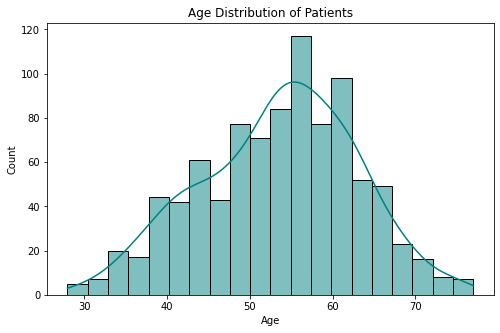

In [244]:
#  Age distribution
plt.figure(figsize=(8,5))
sns.histplot(df['Age'], bins=20, kde=True, color='teal')
plt.title("Age Distribution of Patients")
plt.show()

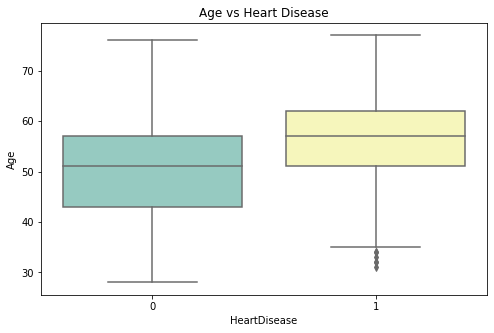

In [245]:
#  Age vs Heart Disease
plt.figure(figsize=(8,5))
sns.boxplot(x='HeartDisease', y='Age', data=df, palette='Set3')
plt.title("Age vs Heart Disease")
plt.show()

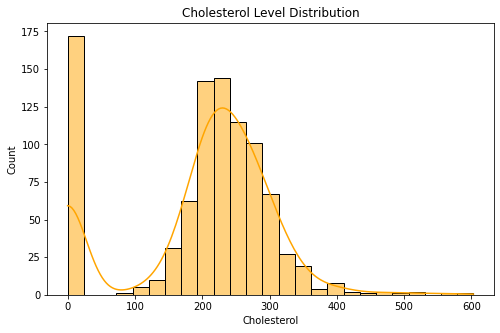

In [246]:
#  Cholesterol distribution
plt.figure(figsize=(8,5))
sns.histplot(df['Cholesterol'], bins=25, kde=True, color='orange')
plt.title("Cholesterol Level Distribution")
plt.show()

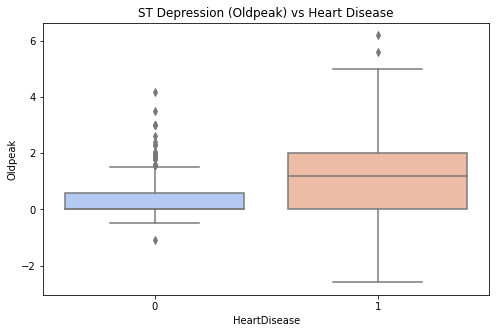

In [247]:
# Oldpeak vs Heart Disease
plt.figure(figsize=(8,5))
sns.boxplot(x='HeartDisease', y='Oldpeak', data=df, palette='coolwarm')
plt.title("ST Depression (Oldpeak) vs Heart Disease")
plt.show()

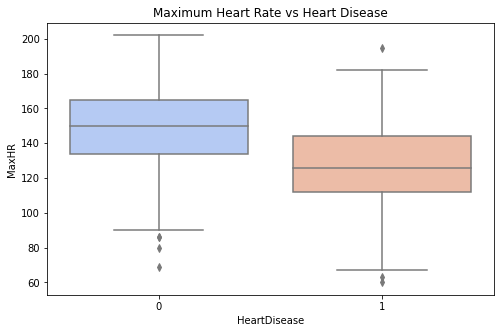

In [248]:
# MaxHR vs Heart Disease
plt.figure(figsize=(8,5))
sns.boxplot(x='HeartDisease', y='MaxHR', data=df, palette='coolwarm')
plt.title("Maximum Heart Rate vs Heart Disease")
plt.show()

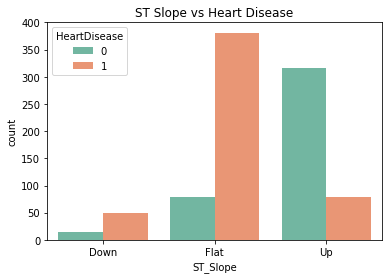

In [249]:
#ST_Slope vs Heart Disease
plt.figure(figsize=(6,4))
sns.countplot(x='ST_Slope', hue='HeartDisease', data=df, palette='Set2')
plt.title("ST Slope vs Heart Disease")
plt.show()


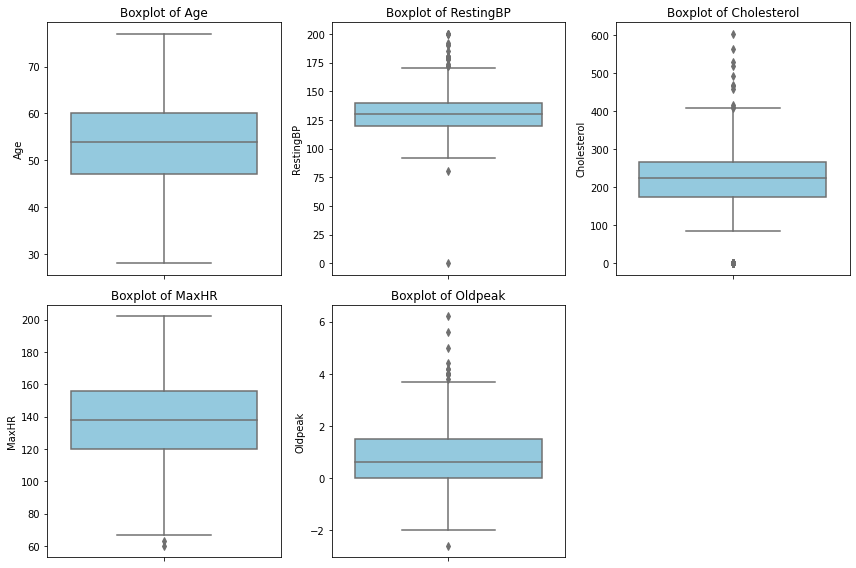

In [250]:
num_cols = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']
plt.figure(figsize=(12,8))
for i, col in enumerate(num_cols, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=df[col], color='skyblue')
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()


In [251]:
for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    print(f"{col}: Outliers if < {Q1 - 1.5*IQR} or > {Q3 + 1.5*IQR}")


Age: Outliers if < 27.5 or > 79.5
RestingBP: Outliers if < 90.0 or > 170.0
Cholesterol: Outliers if < 32.625 or > 407.625
MaxHR: Outliers if < 66.0 or > 210.0
Oldpeak: Outliers if < -2.25 or > 3.75


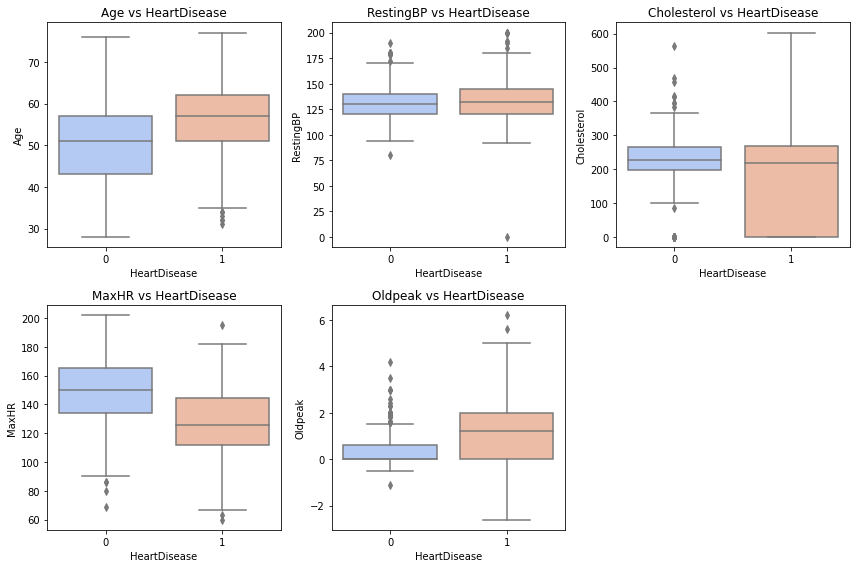

In [252]:
plt.figure(figsize=(12,8))
for i, col in enumerate(num_cols, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x='HeartDisease', y=col, data=df, palette='coolwarm')
    plt.title(f'{col} vs HeartDisease')
plt.tight_layout()
plt.show()


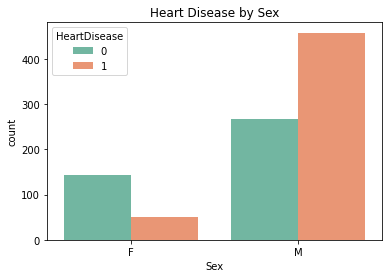

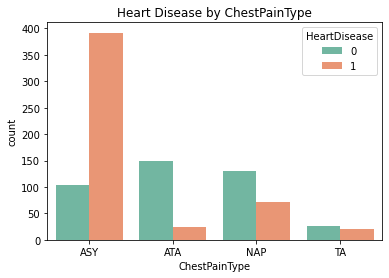

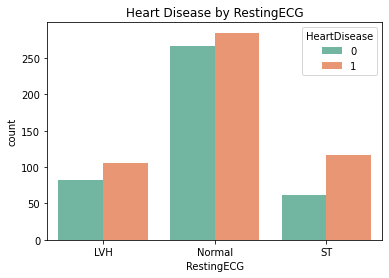

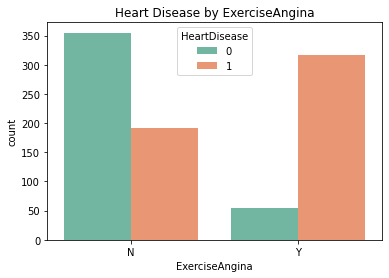

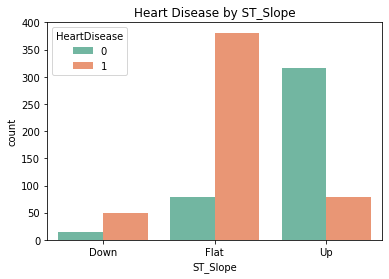

In [253]:
categorical_cols = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']
for col in categorical_cols:
    plt.figure(figsize=(6,4))
    sns.countplot(x=col, hue='HeartDisease', data=df, palette='Set2')
    plt.title(f'Heart Disease by {col}')
    plt.show()


In [254]:
df.groupby('HeartDisease').mean(numeric_only=True)


,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak
HeartDisease,,,,,,
0,50.55,130.18,227.12,0.11,148.15,0.41
1,55.90,134.19,175.94,0.33,127.66,1.27


<AxesSubplot:xlabel='HeartDisease'>

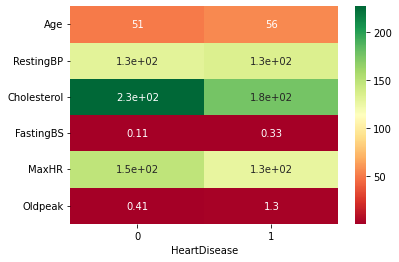

In [255]:
sns.heatmap(df.groupby('HeartDisease').mean(numeric_only=True).T, annot=True, cmap='RdYlGn')


In [256]:
corr_target = df.corr()['HeartDisease'].sort_values(ascending=False)
corr_target


HeartDisease    1.00
Oldpeak         0.40
Age             0.28
FastingBS       0.27
RestingBP       0.11
Cholesterol    -0.23
MaxHR          -0.40
Name: HeartDisease, dtype: float64

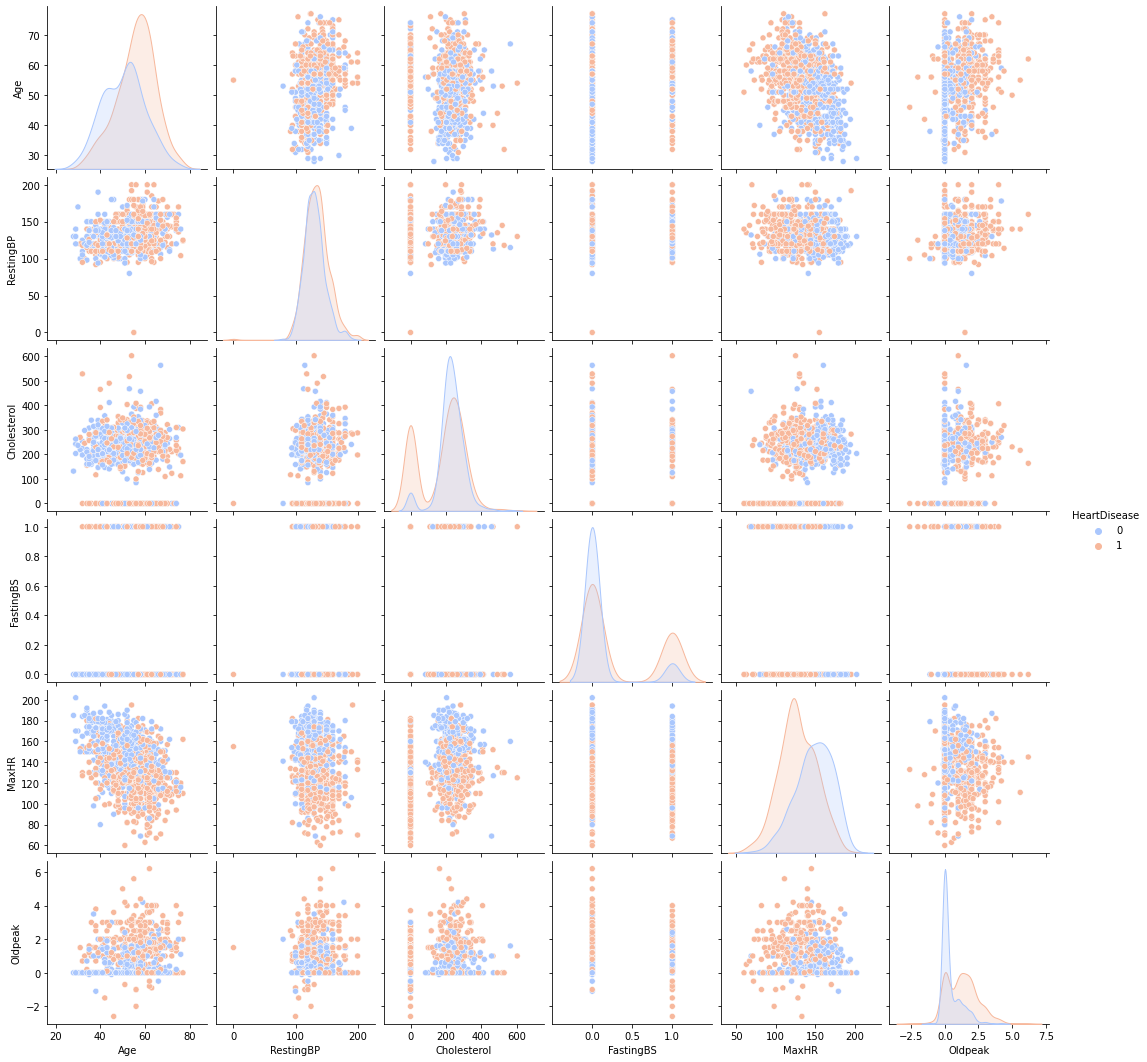

In [257]:
sns.pairplot(df, hue='HeartDisease', diag_kind='kde', palette='coolwarm')

## Dataset Attributes ##
Age : age of the patient [years]

Sex  : sex of the patient [M: Male, F: Female]

ChestPainType : chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]


RestingBP : resting blood pressure [mm Hg]


Cholesterol : serum cholesterol [mm/dl]


FastingBS : fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]


RestingECG : resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]


MaxHR : maximum heart rate achieved [Numeric value between 60 and 202]


ExerciseAngina : exercise-induced angina [Y: Yes, N: No]


Oldpeak : oldpeak = ST [Numeric value measured in depression]


ST_Slope : the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]


HeartDisease : output class [1: heart disease, 0: Normal]